In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X = plt.imread('autumn.tif')

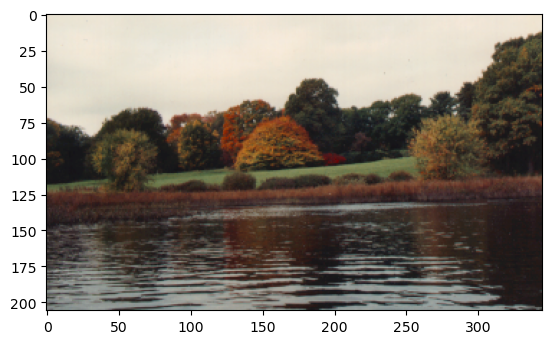

In [7]:
plt.imshow(X)

In [95]:
x1 = X[50:100,75:100]
X2 = X[50:100,75:200]
X3 = X[50:100,50:150]

plt.imsave('x2.png',X2)
plt.imsave('x3.png',X3)

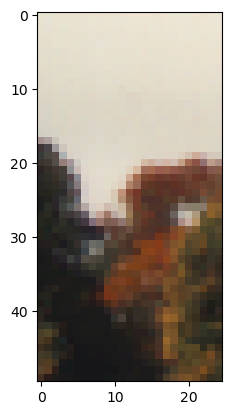

In [90]:
plt.imshow(x1)

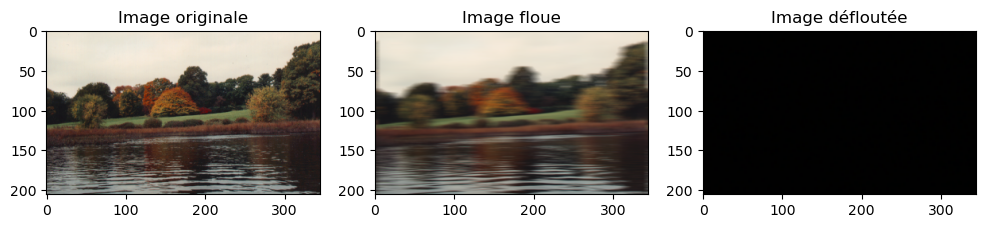

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Fonction de chargement d'image (à adapter selon votre image)
def load_image(image_path):
    img = plt.imread(image_path)  # Charger l'image avec matplotlib
    if img.shape[2] == 4:  # Si l'image contient un canal alpha (transparence)
        img = img[:, :, :3]  # Retirer le canal alpha
    return img

# Fonction pour ajouter du flou (simuler le flou de mouvement)
def add_motion_blur(img, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)  # Créer une PSF linéaire (blur horizontal)
    kernel /= kernel_size
    img_blurred = np.zeros_like(img)
    
    # Appliquer le flou sur chaque canal de couleur (R, G, B)
    for i in range(3):
        img_blurred[:, :, i] = convolve2d(img[:, :, i], kernel, mode='same', boundary='wrap')
    
    plt.imsave('xx1.png',img_blurred)
    
    return img_blurred
    

# Filtre de défloutage par déconvolution inverse
def inverse_filter(img_blurred, kernel, eps=1e-3):
    img_deblurred = np.zeros_like(img_blurred)
    
    # Appliquer la déconvolution sur chaque canal (R, G, B)
    for i in range(3):
        img_fft = np.fft.fft2(img_blurred[:, :, i])
        kernel_fft = np.fft.fft2(kernel, s=img_blurred[:, :, i].shape)
        
        # Inversion du filtre avec un facteur de régularisation pour éviter la division par 0
        img_deblurred_fft = img_fft / (kernel_fft + eps)
        img_deblurred[:, :, i] = np.fft.ifft2(img_deblurred_fft).real
    
    return np.clip(img_deblurred, 0, 1)  # Ramener les valeurs dans l'intervalle [0, 1]

# Filtre de lissage (optionnel pour améliorer les détails après déconvolution)
def smooth_image(img, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)  # Moyenneur simple
    img_smoothed = np.zeros_like(img)
    
    for i in range(3):  # Appliquer le filtre de lissage sur chaque canal
        img_smoothed[:, :, i] = convolve2d(img[:, :, i], kernel, mode='same', boundary='wrap')
    
    return img_smoothed
   

# Fonction principale pour le processus complet
def process_image(image_path):
    # Charger l'image
    img = load_image(image_path)
    
    # Simuler un flou de mouvement
    img_blurred = add_motion_blur(img)
    
    # Créer un noyau de PSF correspondant au flou de mouvement simulé
    kernel_size = 15
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
    kernel /= kernel_size
    
    # Appliquer le filtre de défloutage (déconvolution inverse)
    img_deblurred = inverse_filter(img_blurred, kernel)
    
    # Optionnel : Appliquer un filtre de lissage pour corriger les artefacts
    img_deblurred_smoothed = smooth_image(img_deblurred)
    
    # Affichage des résultats
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title("Image originale")
    plt.imshow(img)
    
    plt.subplot(1, 3, 2)
    plt.title("Image floue")
    plt.imshow(img_blurred)
    
    plt.subplot(1, 3, 3)
    plt.title("Image défloutée")
    plt.imshow(img_deblurred_smoothed)
    
    plt.show()

# Appeler la fonction principale avec un chemin vers une image
process_image('autumn.tif')


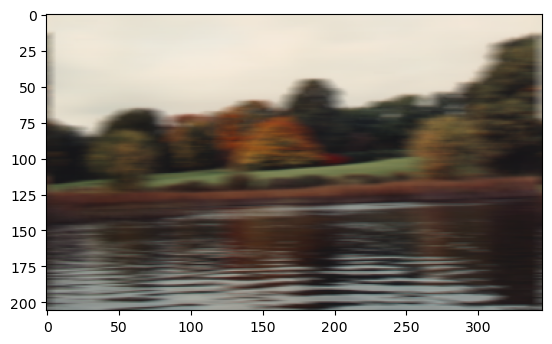

In [59]:
a = plt.imread('xx1.png')
plt.imshow(a)

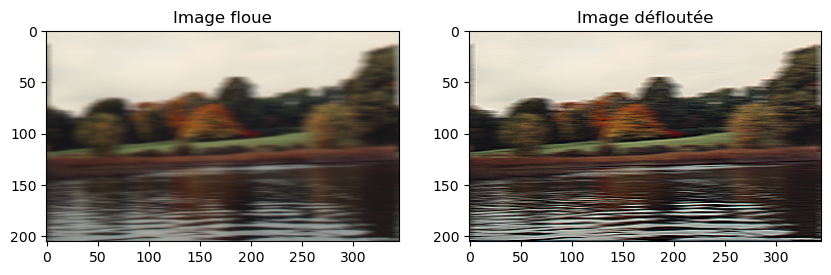

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Fonction pour charger une image et la transformer en matrice NumPy
def load_image(image_path):
    img = plt.imread(image_path)  # Charge l'image avec matplotlib
    if img.shape[2] == 4:  # Si l'image contient un canal alpha (transparence)
        img = img[:, :, :3]  # Retirer le canal alpha
    return img

# Filtre de défloutage basique (déconvolution simple)
def deblur_image(img, kernel):
    img_deblurred = np.zeros_like(img)
    
    # Appliquer la déconvolution inverse (filtre inverse) sur chaque canal de couleur (R, G, B)
    for i in range(3):  # Pour chaque canal R, G, B
        img_deblurred[:, :, i] = convolve2d(img[:, :, i], kernel, mode='same', boundary='wrap')
    
    return np.clip(img_deblurred, 0, 1)  # S'assurer que les valeurs sont dans l'intervalle [0, 1]

# Fonction principale pour déflouter l'image
def process_image(image_path):
    # Charger l'image
    img = load_image(image_path)
    
    # Définir un kernel de défloutage basique (filtre inverse)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Filtre simple de renforcement des bords
    
    # Appliquer la déconvolution (défloutage)
    img_deblurred = deblur_image(img, kernel)
    
    # Afficher les résultats
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Image floue")
    plt.imshow(img)
    
    plt.subplot(1, 2, 2)
    plt.title("Image défloutée")
    plt.imshow(img_deblurred)
    
    plt.show()

# Appeler la fonction avec une image d'exemple
process_image('xx1.png')


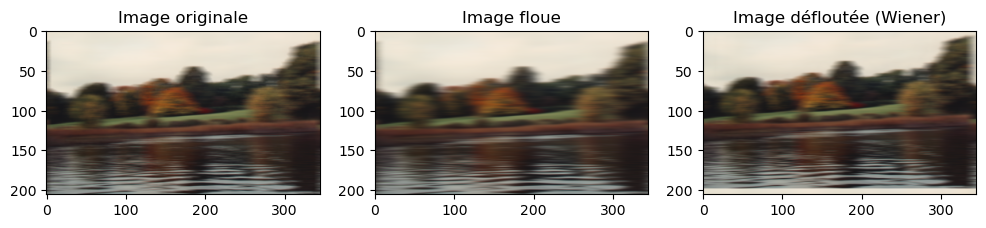

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Fonction pour charger l'image
def load_image(image_path):
    img = plt.imread(image_path)  # Charge l'image
    if img.shape[2] == 4:  # Si l'image contient un canal alpha
        img = img[:, :, :3]  # Enlever le canal alpha
    return img

# Fonction de calcul de la déconvolution de Wiener
def wiener_deconvolution(img_blurred, kernel, K):
    """
    img_blurred: Image floue (matrice NumPy)
    kernel: Kernel de flou
    K: Paramètre de régularisation (contrôle l'effet de lissage)
    """
    img_deblurred = np.zeros_like(img_blurred)
    
    # Appliquer la déconvolution sur chaque canal (R, G, B)
    for i in range(3):
        # Transformer l'image floue et le kernel en espace fréquentiel
        img_fft = np.fft.fft2(img_blurred[:, :, i])
        kernel_fft = np.fft.fft2(kernel, s=img_blurred[:, :, i].shape)
        
        # Calculer la déconvolution de Wiener
        kernel_fft_conj = np.conj(kernel_fft)
        img_deblurred_fft = (kernel_fft_conj / (kernel_fft * kernel_fft_conj + K)) * img_fft
        
        # Revenir à l'espace spatial
        img_deblurred[:, :, i] = np.fft.ifft2(img_deblurred_fft).real
    
    return np.clip(img_deblurred, 0, 1)

# Fonction pour simuler un flou de mouvement
def add_motion_blur(img, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)  # Création d'un kernel de flou linéaire (horizontal)
    kernel /= kernel_size
    
    img_blurred = np.zeros_like(img)
    
    # Appliquer le flou à chaque canal
    for i in range(3):
        img_blurred[:, :, i] = convolve2d(img[:, :, i], kernel, mode='same', boundary='wrap')
    
    return img_blurred, kernel

# Fonction principale pour le traitement de l'image
def process_image(image_path, K=0.01):
    # Charger l'image
    img = load_image(image_path)
    
    # Simuler un flou de mouvement
    img_blurred, kernel = add_motion_blur(img)
    
    # Appliquer la déconvolution de Wiener
    img_deblurred = wiener_deconvolution(img_blurred, kernel, K)
    
    # Afficher les résultats
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title("Image originale")
    plt.imshow(img)
    
    plt.subplot(1, 3, 2)
    plt.title("Image floue")
    plt.imshow(img_blurred)
    
    plt.subplot(1, 3, 3)
    plt.title("Image défloutée (Wiener)")
    plt.imshow(img_deblurred)
    
    plt.show()

# Appeler la fonction avec une image d'exemple et le paramètre K de régularisation
process_image('xx1.png', K=0.01)


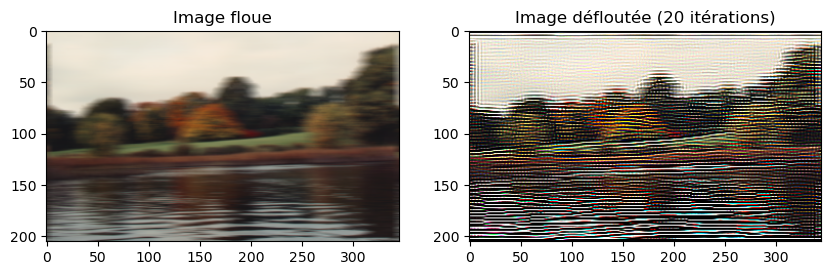

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Fonction pour charger une image
def load_image(image_path):
    img = plt.imread(image_path)
    if img.shape[2] == 4:  # Enlever le canal alpha si présent
        img = img[:, :, :3]
    return img

# Fonction pour générer un kernel de flou gaussien (modèle basique de flou)
def gaussian_kernel(size, sigma):
    """
    size: taille du kernel (par exemple 3x3, 5x5, etc.)
    sigma: écart-type de la distribution gaussienne
    """
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)

# Appliquer la déconvolution itérative (approche basique)
def iterative_deconvolution(img, kernel, num_iterations):
    img_deblurred = np.copy(img)  # Image défloutée initialement égale à l'image floue
    
    for _ in range(num_iterations):
        # Calculer une image re-floutée à partir de l'image défloutée actuelle
        img_reblurred = convolve2d(img_deblurred, kernel, mode='same', boundary='wrap')
        
        # Calculer le ratio entre l'image floue originale et l'image re-floutée
        ratio = img / (img_reblurred + 1e-5)  # Éviter la division par zéro
        
        # Corriger l'image défloutée en multipliant par ce ratio
        img_deblurred = img_deblurred * ratio
    
    return np.clip(img_deblurred, 0, 1)

# Fonction principale pour charger et déflouter une image
def process_image(image_path, num_iterations=10, kernel_size=5, sigma=1.5):
    # Charger l'image
    img = load_image(image_path)
    
    # Générer un kernel gaussien (simulant le flou)
    kernel = gaussian_kernel(kernel_size, sigma)
    
    # Appliquer la déconvolution itérative
    img_deblurred = np.zeros_like(img)
    for i in range(3):  # Appliquer sur chaque canal (R, G, B)
        img_deblurred[:, :, i] = iterative_deconvolution(img[:, :, i], kernel, num_iterations)
    
    # Afficher les résultats
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Image floue")
    plt.imshow(img)
    
    plt.subplot(1, 2, 2)
    plt.title(f"Image défloutée ({num_iterations} itérations)")
    plt.imshow(img_deblurred)
    
    plt.show()

# Appeler la fonction pour traiter une image d'exemple
process_image('xx1.png', num_iterations=20, kernel_size=5, sigma=2)


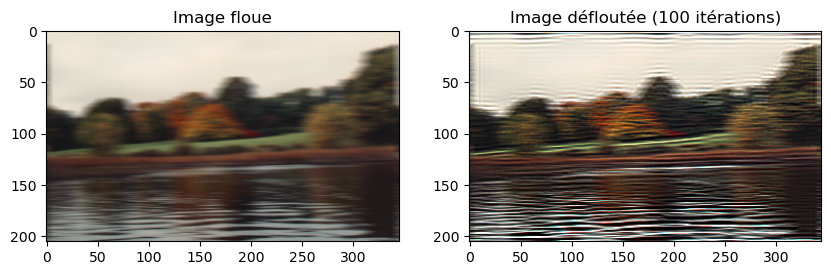

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Fonction pour charger l'image
def load_image(image_path):
    img = plt.imread(image_path)
    if img.shape[2] == 4:  # Si l'image contient un canal alpha
        img = img[:, :, :3]  # Retirer le canal alpha
    return img

# Générer un kernel gaussien pour simuler le flou
def gaussian_kernel(size, sigma):
    """Crée un kernel gaussien."""
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)

# Déconvolution de Richardson-Lucy
def richardson_lucy(img_blurred, kernel, num_iterations):
    """
    Applique la déconvolution de Richardson-Lucy pour réduire le flou.
    """
    img_deblurred = np.full_like(img_blurred, 0.5)  # Initialisation de l'image défloutée
    
    for _ in range(num_iterations):
        # Convolution de l'image actuelle avec le kernel
        img_reblurred = convolve2d(img_deblurred, kernel, mode='same', boundary='wrap')
        
        # Calcul du ratio entre l'image floue et l'image re-floutée
        ratio = img_blurred / (img_reblurred + 1e-5)  # Ajout d'un petit terme pour éviter la division par zéro
        
        # Correction de l'image en multipliant par le kernel inversé
        correction = convolve2d(ratio, kernel[::-1, ::-1], mode='same', boundary='wrap')
        
        # Mise à jour de l'image défloutée
        img_deblurred *= correction
    
    return np.clip(img_deblurred, 0, 1)

# Fonction principale
def process_image(image_path, num_iterations=30, kernel_size=5, sigma=2):
    # Charger l'image
    img = load_image(image_path)
    
    # Générer un kernel gaussien
    kernel = gaussian_kernel(kernel_size, sigma)
    
    # Appliquer la déconvolution de Richardson-Lucy à chaque canal de l'image
    img_deblurred = np.zeros_like(img)
    for i in range(3):  # Appliquer sur les canaux (R, G, B)
        img_deblurred[:, :, i] = richardson_lucy(img[:, :, i], kernel, num_iterations)
    
    # Afficher les résultats
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Image floue")
    plt.imshow(img)
    
    plt.subplot(1, 2, 2)
    plt.title(f"Image défloutée ({num_iterations} itérations)")
    plt.imshow(img_deblurred)
    
    plt.show()

# Appeler la fonction
process_image('xx1.png', num_iterations=100, kernel_size=5, sigma=2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour charger une image en tant que matrice (noir et blanc pour simplifier)
def load_image_as_matrix(path):
    image = plt.imread(path)
    # Convertir en niveaux de gris si c'est en couleur (3 canaux)
    if image.ndim == 3:
        image = np.mean(image, axis=2)
    return image

# Fonction pour rechercher une petite image dans une grande image
def find_subimage(large_image, small_image):
    large_h, large_w = large_image.shape
    small_h, small_w = small_image.shape
    
    for i in range(large_h - small_h + 1):
        for j in range(large_w - small_w + 1):
            # Extraire une sous-matrice de la grande image
            sub_matrix = large_image[i:i + small_h, j:j + small_w]
            
            # Comparer cette sous-matrice avec la petite image
            if np.array_equal(sub_matrix, small_image):
                print(f"Match found at position: ({i}, {j})")
                return (i, j)
    
    print("No match found.")
    return None

# Exemples pour charger et comparer les images
large_image = load_image_as_matrix('path_to_large_image.jpg')
small_image = load_image_as_matrix('path_to_small_image.jpg')

# Rechercher la petite image dans la grande image
position = find_subimage(large_image, small_image)

# Afficher la grande image et la position si trouvée
if position:
    plt.imshow(large_image, cmap='gray')
    plt.gca().add_patch(plt.Rectangle((position[1], position[0]), small_image.shape[1], small_image.shape[0], edgecolor='red', facecolor='none', lw=2))
    plt.show()
